## Homework Assignment 3

In this assignment we ask you to further investigate the crime statistics. 

In [Lecture 2, Week 8](../Week.8/Lecture.2.ipynb) we did a PCA analysis of the crime data where we did daily counts of crimes, *binned* by crime type.  In this assignment we ask you to start your analysis using a few other binning techniques.  We will then ask you to investigate the results, making plots of the data. 

**Problem 1)** Do a PCA analysis where you bin the data into $86*6=516$ bins. There are $86$ crime types, and six $4$-hour periods in a day:
 - midnight to 4am
 - 4am to 8am
 - 8am to noon
 - noon to 4pm
 - 4pm to 8pm
 - 8pm to midnight
 
Thus, for every day, we will have a $516$-component vector that describes the counts of the various crime types in each $4$-hour period.  

 1a) Do PCA analysis on this *binning* of the data.  For the pre-grading script, please print your **explained_variance__**. 

 1b) Interpret the two largest eigenvectors (i.e. eigenvectors with largest eigenvalues).  If the crimes types corellate, what if any relation is there between them? If there is an inverse corellation, what might be the cause of this inverse corellation?
 
 Things to consider (for problems 1,2,3):
  - Do the crimes happen in different locations?  A heat map would help with this. 
  - Do the crime happen  at different times?  A plot might help with this. 
  - If the eigenvectors point to a corellation or inverse correlation, make a scatter plot that could help illustrate this relation. 

In [1]:
## A little code to load the vicpd library from the Week.8 directory.
##  we could of course just move the vicpd.py file. . . but we could also do this.
import os, sys
dirn, modn = os.path.split("vicpd.py")
modn = os.path.splitext(modn)[0]
path = list(sys.path)
sys.path.insert(0, dirn)
try:
     vpd = __import__(modn)
finally:
    sys.path[:] = path # restore

Loading the VicPD library.
[cdata] 5 years and 150 days of crime data. 86607 records total.
[ctypes] tree structure of crime types
[all_tots] totals for crime types
[all_freq] relative frequencies of crime types
[weekdaycount] loaded
[weekdaypct] loaded
[presentBDWeek] loaded
[wdatlist] 5 years and 177 days of weather data, dict of (max c, min c, mean c, rain mm, snow cm) indexed on date
VicPD library loaded.


In [2]:
## You will need this. . .
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib nbagg
import numpy as np
from sklearn.decomposition import PCA

In [18]:
## Problem 1, PCA analysis.

import itertools as it

tbinstr = ["midnight-4am","4am-8am","8am-noon","noon-4pm","4pm-8pm","8pm-midnight"]

# list of crime types, time periods and temperature range.  The binning indices.
ctnl = []
for a,b in vpd.ctypes.items():
    for c,j in it.product(b, range(6)):
        ctnl.append((a,c,j))
        
## reverse-lookup dictionary, to get the index of the crime type and time chunk.
rev_ctnl = dict([(ctnl[i], i) for i in range(len(ctnl))])

## cdata dates as a set
cdays = set([c.incident_datetime.date() for c in vpd.cdata])
cdayl = list(cdays)

## reverse-lookup a date
rdaylook = dict([(cdayl[i], i) for i in range(len(cdayl))])
A = np.zeros( (len(cdayl), len(ctnl) ) )
for c in vpd.cdata: 
    A[rdaylook[c.incident_datetime.date()],\
      rev_ctnl[(c.parent_incident_type, c.incident_type_primary,\
               ((c.incident_datetime.hour) % 24)//4,\
               )]] += 1.0

## build the data matrix. Every day will have a column consisting of the counts
##  of the crime types on that day. 

pca = PCA(n_components=len(ctnl))
pca.fit(A)

C = pca.components_

print(" * * * PCA eig-val mag * * * \n")

for i in range(5):
    print("ev %.8f " %pca.explained_variance_[i], end='')

 * * * PCA eig-val mag * * * 

ev 2.52021175 ev 2.23155810 ev 1.82313694 ev 1.74143715 ev 1.29316205 

In [19]:
## Problem 1, exploration of PCA results. 
def exp_row_pca(C, r):
    ## list of entries w/index
    Cl = [(100*C[r,i], i) for i in range(C.shape[1])]
    Cs = sorted(Cl)
    Cs.reverse()
    Cp = [c for c in Cs if c[0]>0.0]
    Cn = [c for c in Cs if c[0]<0.0]
    Cn.reverse()
    return (Cp, Cn)


def text_corr(C, r):
    Cp, Cn = exp_row_pca(C,r)
    print("+corr: ")
    for x in Cp:
        if (x[0]>15.0):
            print(" ", ctnl[x[1]][0]+"--"+ctnl[x[1]][1]+" "+tbinstr[ctnl[x[1]][2]]," pct %.1f" % x[0])
    print("-corr: ")
    for x in Cn:
        if (x[0]<-15.0):
            print(" ", ctnl[x[1]][0]+"--"+ctnl[x[1]][1]+" "+tbinstr[ctnl[x[1]][2]]," pct %.1f" % x[0])
            
for i in range(2):
    if (i!=0): print("\n")
    print("Eigenvalue ", i+1, " variance %.1f" % pca.explained_variance_[i])
    text_corr(C,i)


Eigenvalue  1  variance 2.5
+corr: 
  Liquor--LIQUOR-INTOX IN PUBLIC PLACE 8pm-midnight  pct 49.4
  Liquor--LIQUOR-INTOX IN PUBLIC PLACE midnight-4am  pct 46.8
  Other--BYLAW-NOISE 8pm-midnight  pct 35.7
  Other--BYLAW-NOISE midnight-4am  pct 32.7
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 8pm-midnight  pct 24.3
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE midnight-4am  pct 19.6
  Liquor--LIQUOR-INTOX IN PUBLIC PLACE 4pm-8pm  pct 19.2
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE noon-4pm  pct 18.1
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 4pm-8pm  pct 17.3
-corr: 


Eigenvalue  2  variance 2.2
+corr: 
  Theft from Vehicle--THEFT FROM MV UNDER $5000 8am-noon  pct 49.3
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE noon-4pm  pct 31.9
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 8am-noon  pct 27.5
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 4pm-8pm  pct 25.4
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 8pm-midnight  pct 17.8
  Theft from Vehicle--THEFT FROM MV UNDER $5000 noon-4pm  pct 17.6
  Liquor--LIQUOR-INTOX IN PUBLIC 

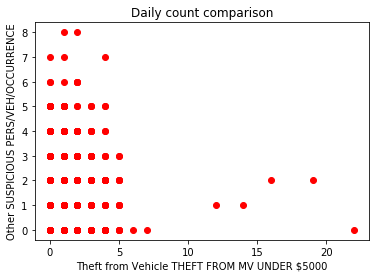

In [22]:
def xyplot(pit1, itp1, pit2, itp2):
    x=[A[i,rev_ctnl[(pit1,itp1,5)]] for i in range(len(cdayl))]
    y=[A[i,rev_ctnl[(pit2,itp2,5)]] for i in range(len(cdayl))]
    return x,y 
def makeccplot(pit1, itp1, pit2, itp2):
    plt.xlabel( (pit1+" "+itp1) )
    plt.ylabel( (pit2+" "+itp2) )
    plt.title( "Daily count comparison" )
    x,y = xyplot(pit1, itp1, pit2, itp2)
    plt.plot(x,y,'ro', label='daily incidences')
xyplot('Liquor','LIQUOR-INTOX IN PUBLIC PLACE',\
           'Other','BYLAW-NOISE')
makeccplot('Liquor','LIQUOR-INTOX IN PUBLIC PLACE',\
           'Other','BYLAW-NOISE')


In [ ]:
##Liquor and Bylaw-noise have a positive correlation. They both happened easily during 8pm to 4am. And they often happened in downtown. 

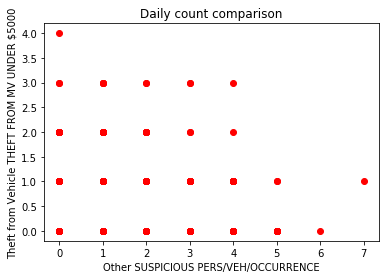

In [24]:
xyplot('Other','SUSPICIOUS PERS/VEH/OCCURRENCE',\
           'Theft from Vehicle','THEFT FROM MV UNDER $5000')
makeccplot('Other','SUSPICIOUS PERS/VEH/OCCURRENCE',\
           'Theft from Vehicle','THEFT FROM MV UNDER $5000')

In [ ]:
##Theft from vehicle and suspicious pers/veh/occurrence have a positive correlation. 
##They both happened easily during 8am to 4pm

**Problem 2)** Re-do problem (1), but using time bins shifted by $2$ hours, i.e. we will consider our days to **start** at 2am, with time bins 2am to 6am,  6am to 10am, . . ., 10pm to 2am.  Do your results change significantly?  If any of your first four largest eigenvectors have changed substantially, describe the changes.  If you see any new, strong correllations or inverse-correllations try to find explanations for them.  Print your **explained_variance__** again for the pre-grading script. 

In [10]:
## Problem 2, PCA analysis.
import itertools as it

tbinstr = ["2am-6am","6am-10am","10am-2pm","2pm-6pm","6pm-10pm","10pm-2am"]

# list of crime types, time periods and temperature range.  The binning indices.
ctnl = []
for a,b in vpd.ctypes.items():
    for c,j in it.product(b, range(6)):
        ctnl.append((a,c,j))
        
## reverse-lookup dictionary, to get the index of the crime type and time chunk.
rev_ctnl = dict([(ctnl[i], i) for i in range(len(ctnl))])

## cdata dates as a set
cdays = set([c.incident_datetime.date() for c in vpd.cdata])
cdayl = list(cdays)

## reverse-lookup a date
rdaylook = dict([(cdayl[i], i) for i in range(len(cdayl))])
A = np.zeros( (len(cdayl), len(ctnl) ) )
import datetime as dt
for c in vpd.cdata: 
    h=c.incident_datetime.hour
    dayc=c.incident_datetime.date()
    if h < 2:
        dayc=dayc-dt.timedelta(1)
    if dayc not in rdaylook:
        continue
    
    A[rdaylook[dayc],\
      rev_ctnl[(c.parent_incident_type, c.incident_type_primary,\
               ((c.incident_datetime.hour-2) % 24)//4,\
               )]] += 1.0

## build the data matrix. Every day will have a column consisting of the counts
##  of the crime types on that day. 

pca = PCA(n_components=len(ctnl))
pca.fit(A)

C = pca.components_

print(" * * * PCA eig-val mag * * * \n")

for i in range(5):
    print("ev %.8f " %pca.explained_variance_[i], end='')


 * * * PCA eig-val mag * * * 

ev 2.91387312 ev 2.08188974 ev 1.66330503 ev 1.57591274 ev 1.32800574 

In [11]:
def exp_row_pca(C, r):
    ## list of entries w/index
    Cl = [(100*C[r,i], i) for i in range(C.shape[1])]
    Cs = sorted(Cl)
    Cs.reverse()
    Cp = [c for c in Cs if c[0]>0.0]
    Cn = [c for c in Cs if c[0]<0.0]
    Cn.reverse()
    return (Cp, Cn)


def text_corr(C, r):
    Cp, Cn = exp_row_pca(C,r)
    print("+corr: ")
    for x in Cp:
        if (x[0]>15.0):
            print(" ", ctnl[x[1]][0]+"--"+ctnl[x[1]][1]+" "+tbinstr[ctnl[x[1]][2]]," pct %.1f" % x[0])
    print("-corr: ")
    for x in Cn:
        if (x[0]<-15.0):
            print(" ", ctnl[x[1]][0]+"--"+ctnl[x[1]][1]+" "+tbinstr[ctnl[x[1]][2]]," pct %.1f" % x[0])
            
for i in range(2):
    if (i!=0): print("\n")
    print("Eigenvalue ", i+1, " variance %.1f" % pca.explained_variance_[i])
    text_corr(C,i)



Eigenvalue  1  variance 2.9
+corr: 
  Other--BYLAW-NOISE 10pm-2am  pct 61.7
  Liquor--LIQUOR-INTOX IN PUBLIC PLACE 10pm-2am  pct 54.5
  Liquor--LIQUOR-INTOX IN PUBLIC PLACE 6pm-10pm  pct 32.4
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 10pm-2am  pct 19.5
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 6pm-10pm  pct 15.6
-corr: 


Eigenvalue  2  variance 2.1
+corr: 
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 10am-2pm  pct 41.4
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 2pm-6pm  pct 39.9
  Theft from Vehicle--THEFT FROM MV UNDER $5000 6am-10am  pct 35.9
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 6pm-10pm  pct 30.9
  Theft from Vehicle--THEFT FROM MV UNDER $5000 10am-2pm  pct 24.4
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 10pm-2am  pct 19.6
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 6am-10am  pct 18.8
-corr: 
  Other--BYLAW-NOISE 10pm-2am  pct -27.8


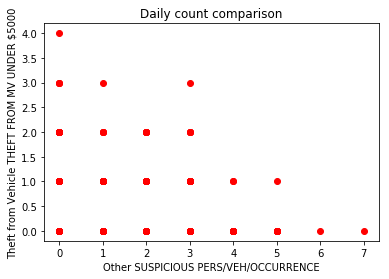

In [12]:
## Problem 2, explanation of PCA results. 
xyplot('Other','SUSPICIOUS PERS/VEH/OCCURRENCE',\
           'Theft from Vehicle','THEFT FROM MV UNDER $5000')
makeccplot('Other','SUSPICIOUS PERS/VEH/OCCURRENCE',\
           'Theft from Vehicle','THEFT FROM MV UNDER $5000')


In [ ]:
##Theft from vehicle and suspicious pers/veh/occurrence have a positive correlation. 


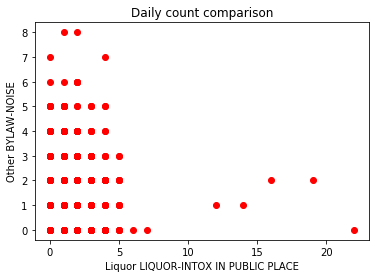

In [25]:
xyplot('Liquor','LIQUOR-INTOX IN PUBLIC PLACE',\
           'Other','BYLAW-NOISE')
makeccplot('Liquor','LIQUOR-INTOX IN PUBLIC PLACE',\
           'Other','BYLAW-NOISE')


In [ ]:
##Liquor and Bylaw-noise have a positive correlation. They both happened easily during 10pm to 2am

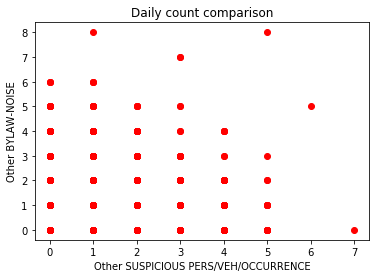

In [26]:
xyplot('Other','SUSPICIOUS PERS/VEH/OCCURRENCE',\
           'Other','BYLAW-NOISE')
makeccplot('Other','SUSPICIOUS PERS/VEH/OCCURRENCE',\
           'Other','BYLAW-NOISE')


In [ ]:
#There is a negative correlation between suspicious pers/veh/occurrence and bylaw-noise in 10am-2am peroid


**Problem 3)** Re-do Problem (1) using four $6$-hour bins 4am-10am, 10am-4pm, 4pm-10pm and 10pm-4am, together with five bins for daily temperatures, and of course the bins for crime type.  

You will have a collection of $k$ vectors in $\mathbb R^n$ with $n=4 \cdot 86 \cdot 5 = 1720$ and $k$ equal to the number of days in the database.  

Divide the temperature range into these five bins: 
$$T \leq 5.1, \hskip 1cm 5.1<T\leq 8.4, \hskip 1cm 8.4<T\leq 12.3 \hskip 1cm 12.3<T \leq 15.9, \hskip 1cm 15.9<T$$
and use mean temperatures.  These are roughly the divisions of Victoria's temperature-range into its pentiles. 

Like problems (1) and (2), print the output of your **explained_variance__** for the pre-grading script. 

In [14]:
## Problem 3, PCA analysis.
import itertools as it

tbinstr = ['4am-10am', '10am-4pm', '4pm-10pm', '10pm-4am']

# list of crime types, time periods and temperature range.  The binning indices.
ctnl = []
for a,b in vpd.ctypes.items():
    for c,j,k in it.product(b, range(4), range(5)):
        ctnl.append((a,c,j,k))
        
## reverse-lookup dictionary, to get the index of the crime type and time chunk.
rev_ctnl = dict([(ctnl[i], i) for i in range(len(ctnl))])

## cdata dates as a set
cdays = set([c.incident_datetime.date() for c in vpd.cdata])
cdayl = list(cdays)

## reverse-lookup a date
rdaylook = dict([(cdayl[i], i) for i in range(len(cdayl))])

## get the temperature bin
def tBin(T):
    if T<=5.1: return 0
    elif 5.1< T <= 8.4: return 1
    elif 8.4< T <= 12.3: return 2
    elif 12.3< T <= 15.9: return 3
    else:
        return 4

A = np.zeros( (len(cdayl), len(ctnl) ) )
for c in vpd.cdata:
       
    import datetime as dt
    h=c.incident_datetime.hour
    dayc=c.incident_datetime.date()
    if h < 4:
        dayc=dayc-dt.timedelta(1)
    if dayc not in rdaylook or c.incident_datetime.date() not in vpd.wdatlist:
        continue
    A[rdaylook[dayc],\
      rev_ctnl[(c.parent_incident_type, c.incident_type_primary,\
               ((c.incident_datetime.hour-4) % 24)//6,\
               tBin(vpd.wdatlist[c.incident_datetime.date()][2]))]] += 1.0

## build the data matrix. Every day will have a column consisting of the counts
##  of the crime types on that day. 

pca = PCA(n_components=len(ctnl))
pca.fit(A)

C = pca.components_

print(" * * * PCA eig-val mag * * * \n")

for i in range(5):
    print("ev %.8f " %pca.explained_variance_[i], end='')


 * * * PCA eig-val mag * * * 

ev 7.62893222 ev 6.16498462 ev 5.20412475 ev 4.40512358 ev 1.19971401 

In [15]:
def exp_row_pca(C, r):
    ## list of entries w/index
    Cl = [(100*C[r,i], i) for i in range(C.shape[1])]
    Cs = sorted(Cl)
    Cs.reverse()
    Cp = [c for c in Cs if c[0]>0.0]
    Cn = [c for c in Cs if c[0]<0.0]
    Cn.reverse()
    return (Cp, Cn)

tBinName=['T<=5.1','5.1<T<=8.4','8.4<T<=12.3','12.3<T<=15.9','T>15.9']
def text_corr(C, r):
    Cp, Cn = exp_row_pca(C,r)
    print("+corr: ")
    for x in Cp:
        if (x[0]>15.0):
            print(" ", ctnl[x[1]][0]+"--"+ctnl[x[1]][1]+" "+tbinstr[ctnl[x[1]][2]],\
                  ''+tBinName[ctnl[x[1]][3]]," pct %.1f" % x[0])
    print("-corr: ")
    for x in Cn:
        if (x[0]<-15.0):
            print(" ", ctnl[x[1]][0]+"--"+ctnl[x[1]][1]+" "+tbinstr[ctnl[x[1]][2]],\
                  ''+tBinName[ctnl[x[1]][3]]," pct %.1f" % x[0])
            
for i in range(2):
    if (i!=0): print("\n")
    print("Eigenvalue ", i+1, " variance %.1f" % pca.explained_variance_[i])
    text_corr(C,i)




Eigenvalue  1  variance 7.6
+corr: 
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 4pm-10pm T>15.9  pct 32.4
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 10am-4pm T>15.9  pct 30.2
  Other--BYLAW-NOISE 10pm-4am T>15.9  pct 25.9
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 10pm-4am T>15.9  pct 23.9
  Theft--THEFT-OTHER UNDER $5000 10am-4pm T>15.9  pct 22.7
  Liquor--LIQUOR-INTOX IN PUBLIC PLACE 10pm-4am T>15.9  pct 22.4
  Theft from Vehicle--THEFT FROM MV UNDER $5000 10am-4pm T>15.9  pct 21.8
  Liquor--LIQUOR-INTOX IN PUBLIC PLACE 4pm-10pm T>15.9  pct 21.0
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 4am-10am T>15.9  pct 17.8
  Theft from Vehicle--THEFT FROM MV UNDER $5000 4am-10am T>15.9  pct 16.4
  Theft--THEFT-OTHER UNDER $5000 4pm-10pm T>15.9  pct 15.9
  Property Crime--MISCHIEF $5000 OR UNDER 10am-4pm T>15.9  pct 15.7
  Theft--THEFT-SHOPLIFTING UNDER $5000 4pm-10pm T>15.9  pct 15.1
-corr: 


Eigenvalue  2  variance 6.2
+corr: 
  Other--SUSPICIOUS PERS/VEH/OCCURRENCE 4pm-10pm 12.3<T<=15.9  pct 31.5
  Othe

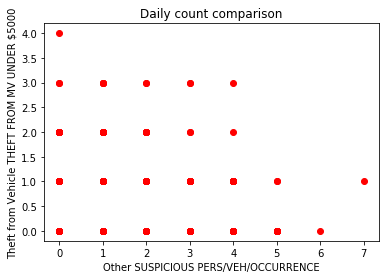

In [23]:
## Problem 3, explanation of PCA results. 
xyplot('Other','SUSPICIOUS PERS/VEH/OCCURRENCE',\
           'Theft from Vehicle','THEFT FROM MV UNDER $5000')
makeccplot('Other','SUSPICIOUS PERS/VEH/OCCURRENCE',\
           'Theft from Vehicle','THEFT FROM MV UNDER $5000')
##

In [ ]:
##Theft from vehicle and suspicious pers/veh/occurrence have a positive correlation. 


### When complete

Save your assignment in **Homework/asst.3.ipynb** in your **mp248** bitbucket repository.  

A pre-grading script will start running on Monday (Feb 27th), and will give you feedback in your Grades Feedback item for Assignment 3 (Simple Submissions) on Course Spaces.  The script will only be able to tell you if it can find your assignment, and if the eigenvalues of the PCA analysis are close to the right answer, to about 8 decimal places. 

The assignment that is on your BitBucket repository at **noon**, of **March 8th** is the assignment that will be graded. 
